In [1]:
# We are using pandas, numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
org_data = np.array([[1, 0, 2],
[0, 2, 1],
[2, 1, 0]])

In [3]:
# Subtract mean from data
mean = np.mean(org_data, axis=0)
print("Mean ", mean.shape)
mean_data = org_data - mean
print("Data after subtracting mean ", mean_data.shape, "\n")
# Compute covariance matrix
cov = np.cov(mean_data.T)
cov = np.round(cov, 2)
print("Covariance matrix ", cov.shape, "\n")
print(cov)

Mean  (3,)
Data after subtracting mean  (3, 3) 

Covariance matrix  (3, 3) 

[[ 1.  -0.5 -0.5]
 [-0.5  1.  -0.5]
 [-0.5 -0.5  1. ]]


In [4]:
# Perform eigen decomposition of covariance matrix
eig_val, eig_vec = np.linalg.eigh(cov)
print("Eigen vectors \n", eig_vec)
print("\n\nEigen values ", eig_val, "\n")
 


Eigen vectors 
 [[ 0.57735027  0.50766227  0.63948861]
 [ 0.57735027 -0.80764452  0.11990412]
 [ 0.57735027  0.29998225 -0.75939273]]


Eigen values  [0.  1.5 1.5] 



In [5]:
eig_val.shape

(3,)

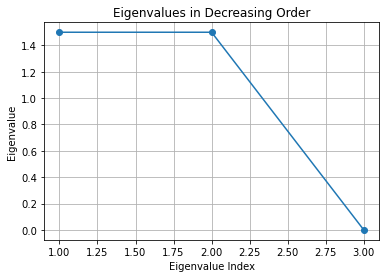

In [6]:
# Sort eigen values and corresponding eigen vectors in descending order
indices = np.argsort(eig_val)[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]
 
# Plot the eigenvalues
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(eig_val) + 1), eig_val, marker='o')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues in Decreasing Order')
plt.grid(True)
plt.show() 

In [7]:
indices

array([2, 1, 0], dtype=int64)

In [8]:
# Sort the eigenvalues and eigenvectors in decreasing order
eigenvalues = eig_val
eigenvectors = eig_vec
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
 
# Choose the feature vector for two principal components
num_components = 2
feature_vector = sorted_eigenvectors[:, :num_components]
 
print("Feature Vector:")
print(feature_vector)

Feature Vector:
[[ 0.50766227  0.63948861]
 [-0.80764452  0.11990412]
 [ 0.29998225 -0.75939273]]


In [9]:
feature_vector

array([[ 0.50766227,  0.63948861],
       [-0.80764452,  0.11990412],
       [ 0.29998225, -0.75939273]])

Reduced Data Matrix:
[[ 1.10762677 -0.87929684]
 [-1.31530679 -0.5195845 ]
 [ 0.20768002  1.39888134]]


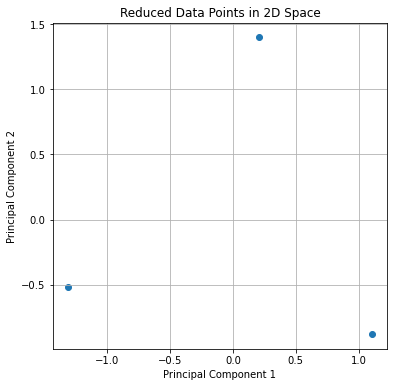

In [10]:
 
# Project the original data onto the feature vector

reduced_data = np.dot(org_data.T, feature_vector)
 
print("Reduced Data Matrix:")
print(reduced_data)
 
# Plot the reduced data points in 2D space
plt.figure(figsize=(6, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Reduced Data Points in 2D Space')
plt.grid(True)
plt.show()
